In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
df = pd.read_csv("mushrooms.csv")


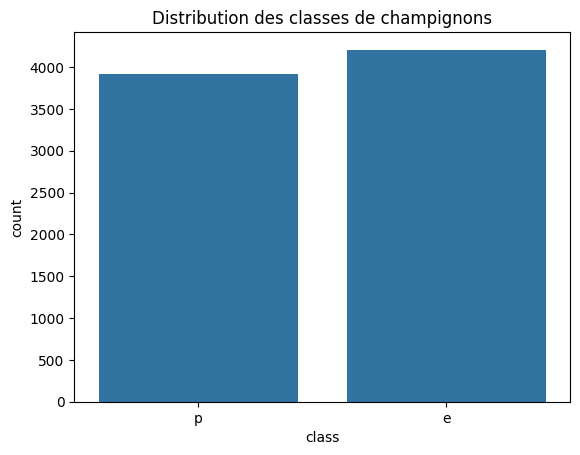

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [12]:

# Visualiser la distribution des classes
sns.countplot(x='class', data=df)
plt.title('Distribution des classes de champignons')
plt.show()

# Afficher les types de colonnes
print(df.dtypes)


In [13]:
# Vérifiez les valeurs manquantes
print(df.isnull().sum())

# Encoder la colonne 'class'
df['class'] = df['class'].map({'e': 1, 'p': 0})  # 1 pour comestible, 0 pour vénéneux

# Encoder les variables catégorielles
df_encoded = pd.get_dummies(df.drop('class', axis=1), drop_first=True)

# Combiner les données encodées avec la colonne cible
df_final = pd.concat([df_encoded, df['class']], axis=1)


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [14]:
X = df_final.drop('class', axis=1)
y = df_final['class']

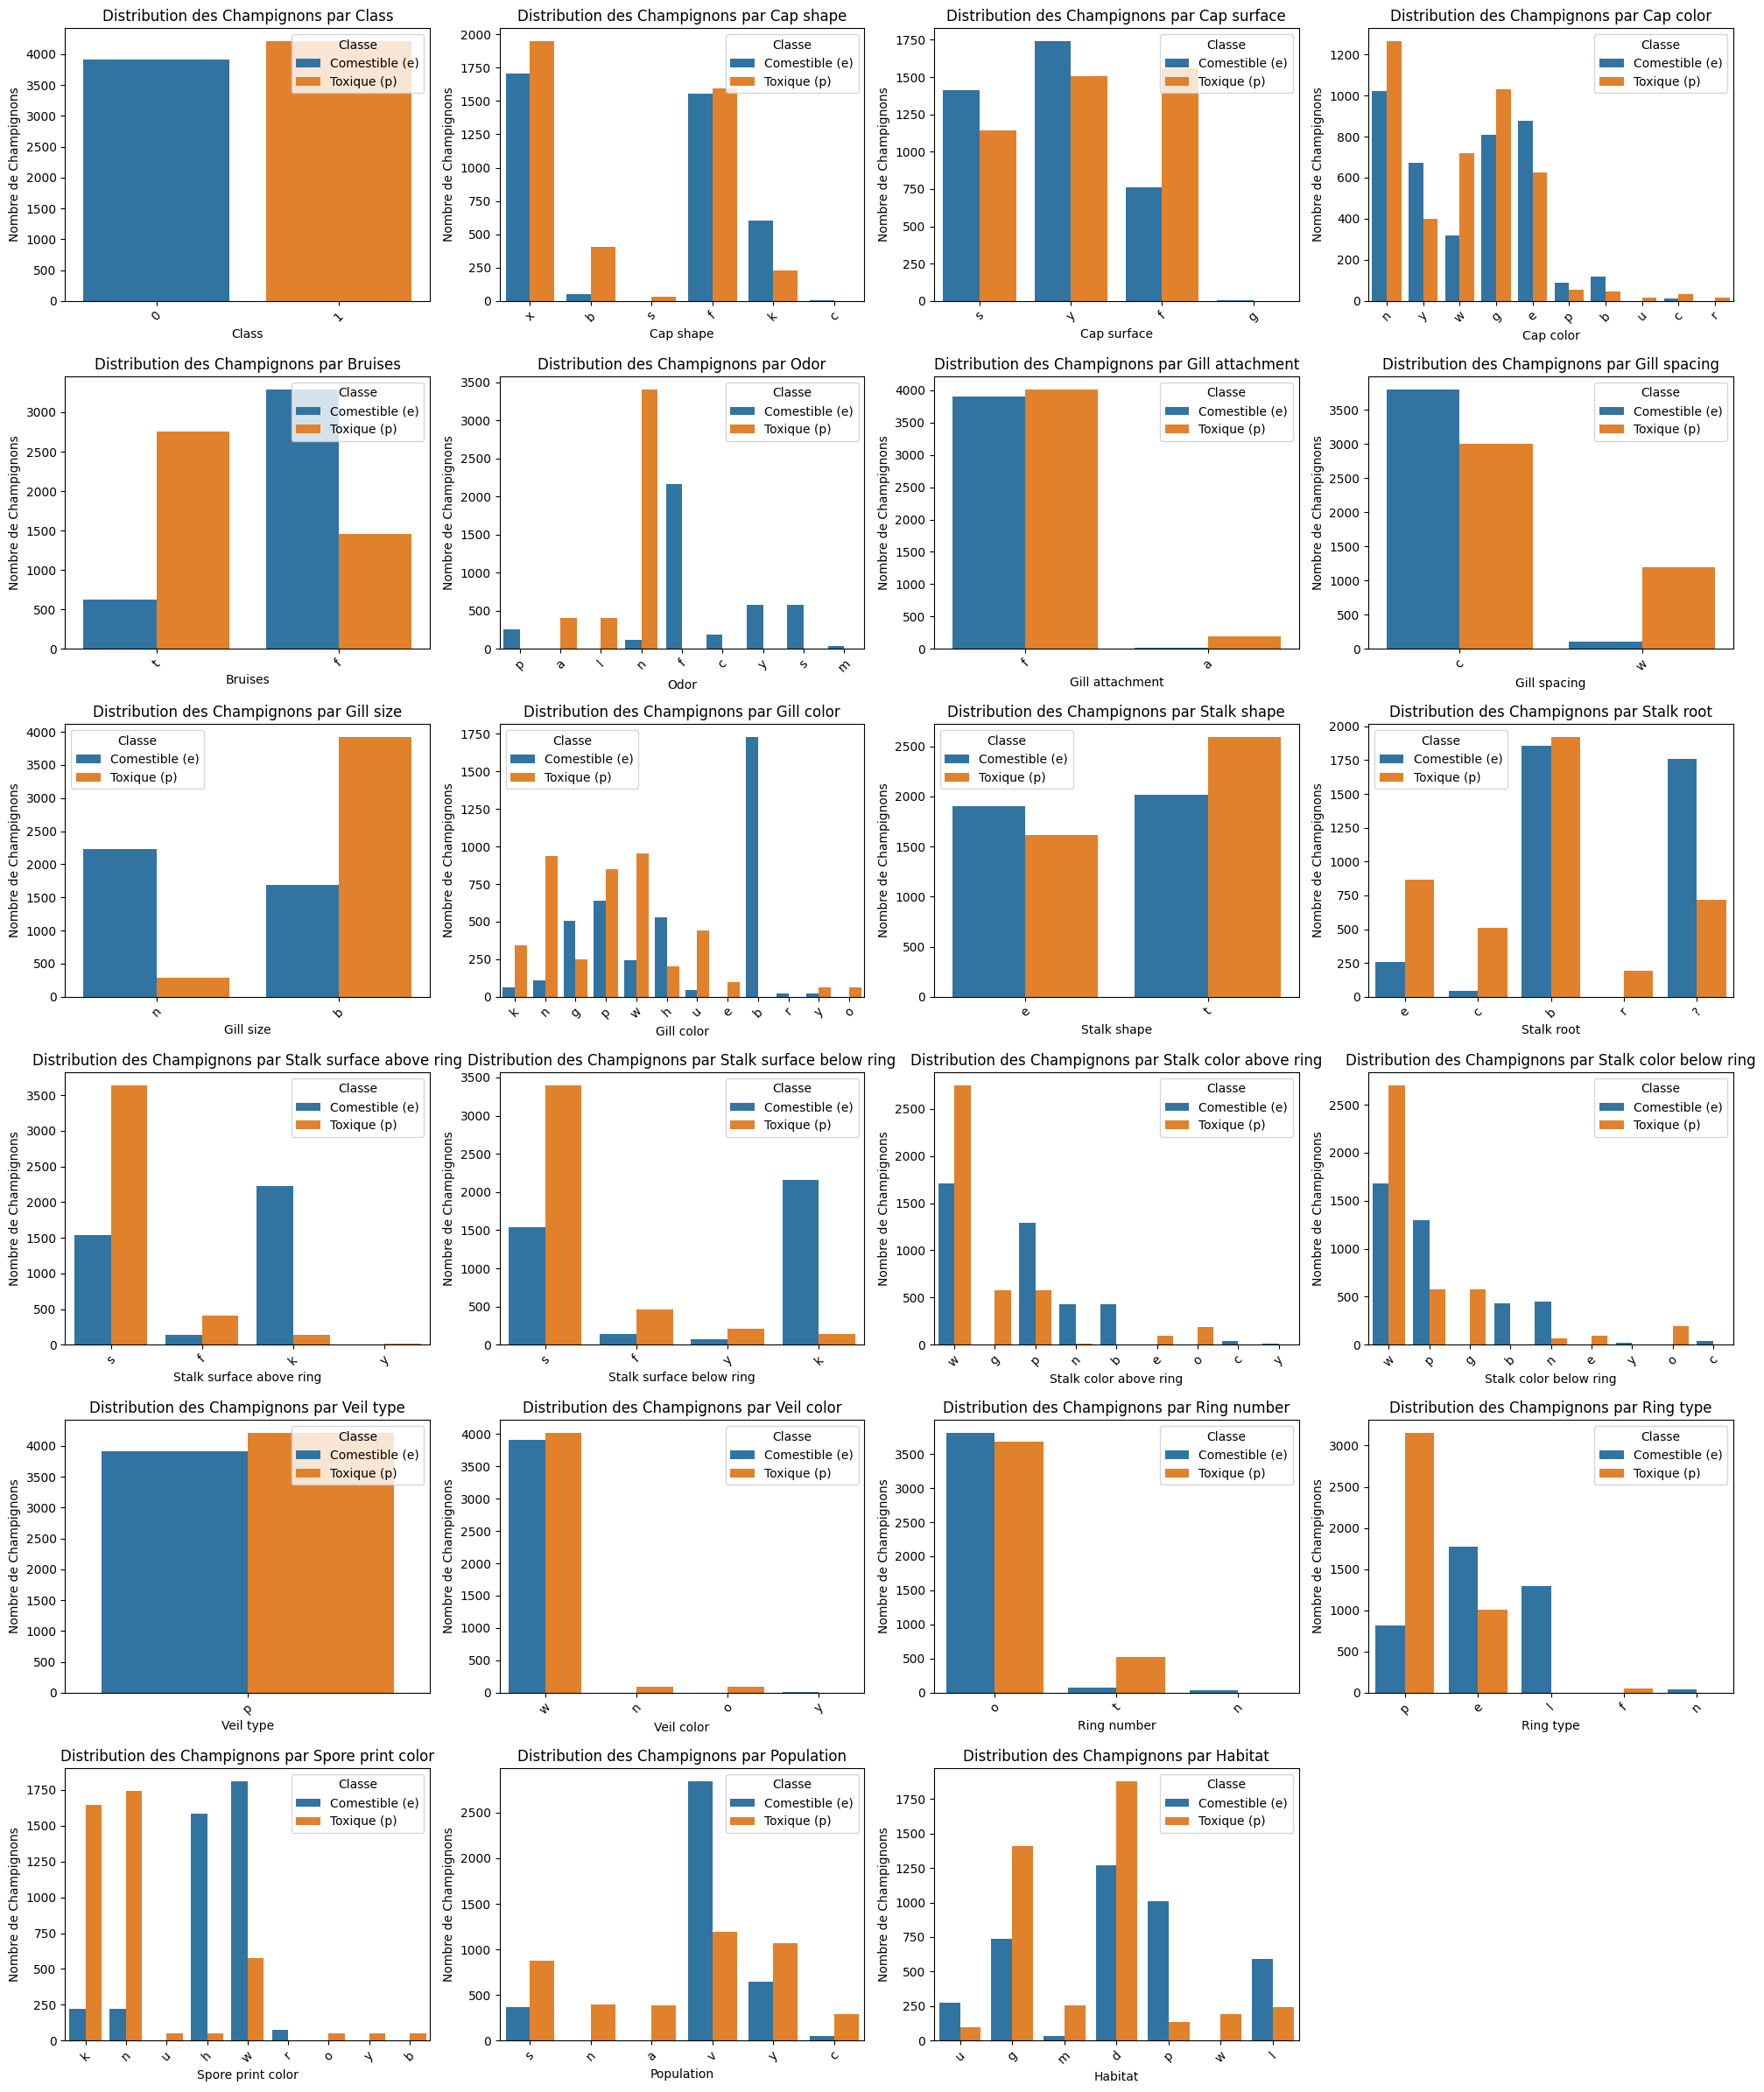

In [19]:
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(20, n_rows * 4))  # Ajuster la taille de la figure

# Créer des graphiques pour chaque attribut
for i, attr in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Positionner le subplot
    sns.countplot(x=attr, hue='class', data=df)
    plt.title(f'Distribution des Champignons par {attr.replace("-", " ").capitalize()}')
    plt.xlabel(attr.replace("-", " ").capitalize())
    plt.ylabel('Nombre de Champignons')
    plt.legend(title='Classe', labels=['Comestible (e)', 'Toxique (p)'])
    plt.xticks(rotation=45)


plt.tight_layout()  # Ajuster l'espacement
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

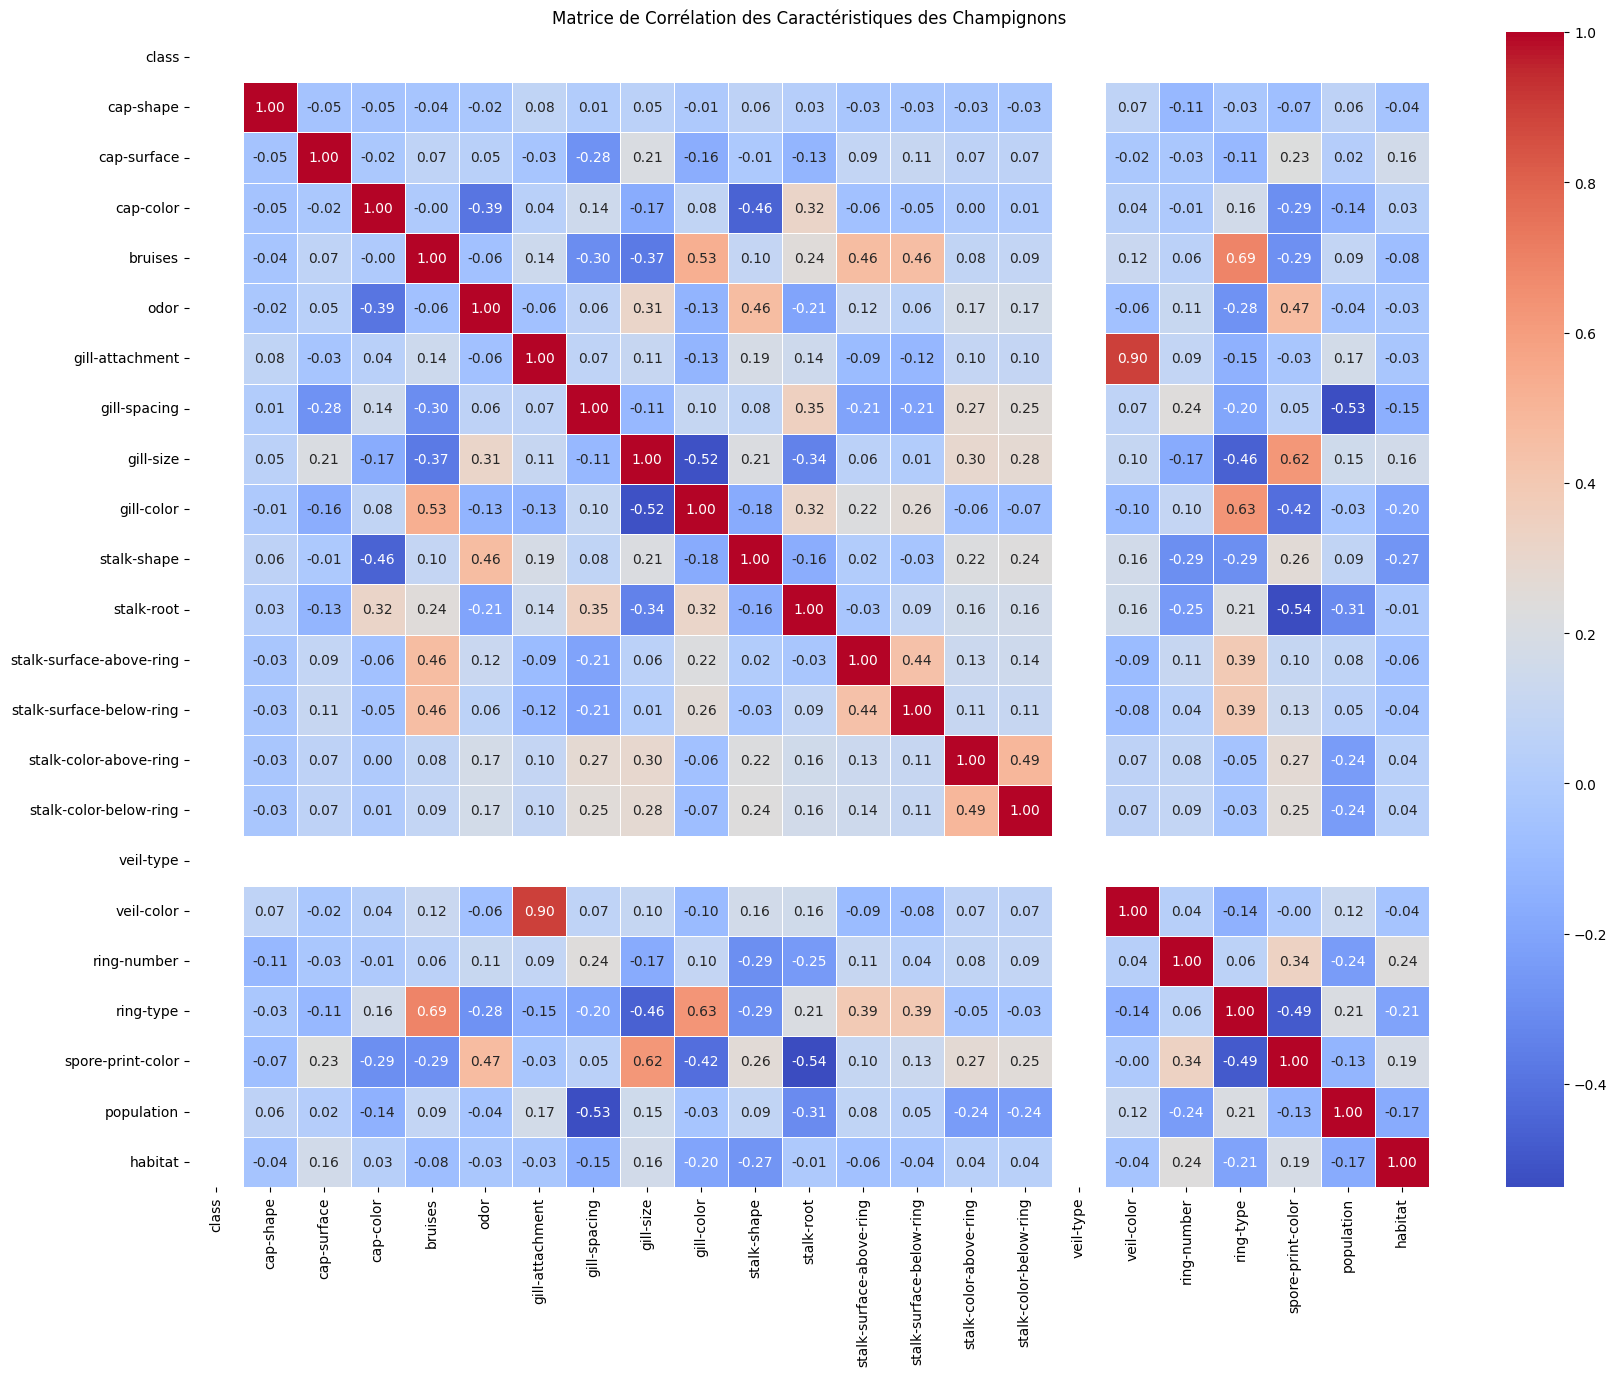

In [31]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Configurer la taille de la figure pour le heatmap
plt.figure(figsize=(20, 15))

# Tracer la heatmap de la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Matrice de Corrélation des Caractéristiques des Champignons')
plt.show()



In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Créer le modèle
model = RandomForestClassifier(random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       782
           1       1.00      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



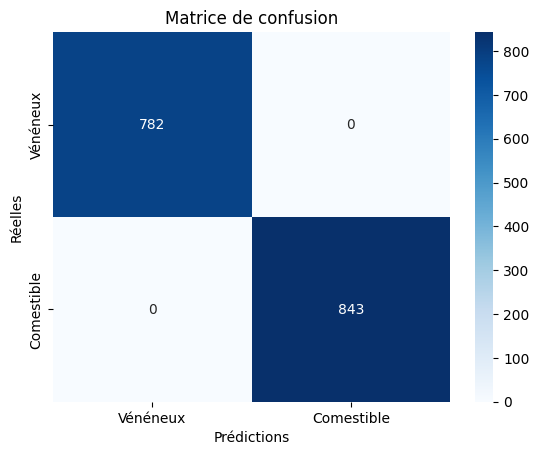

In [10]:
# Rapport de classification
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Vénéneux', 'Comestible'], yticklabels=['Vénéneux', 'Comestible'])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()
